In [12]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

### Problem 1

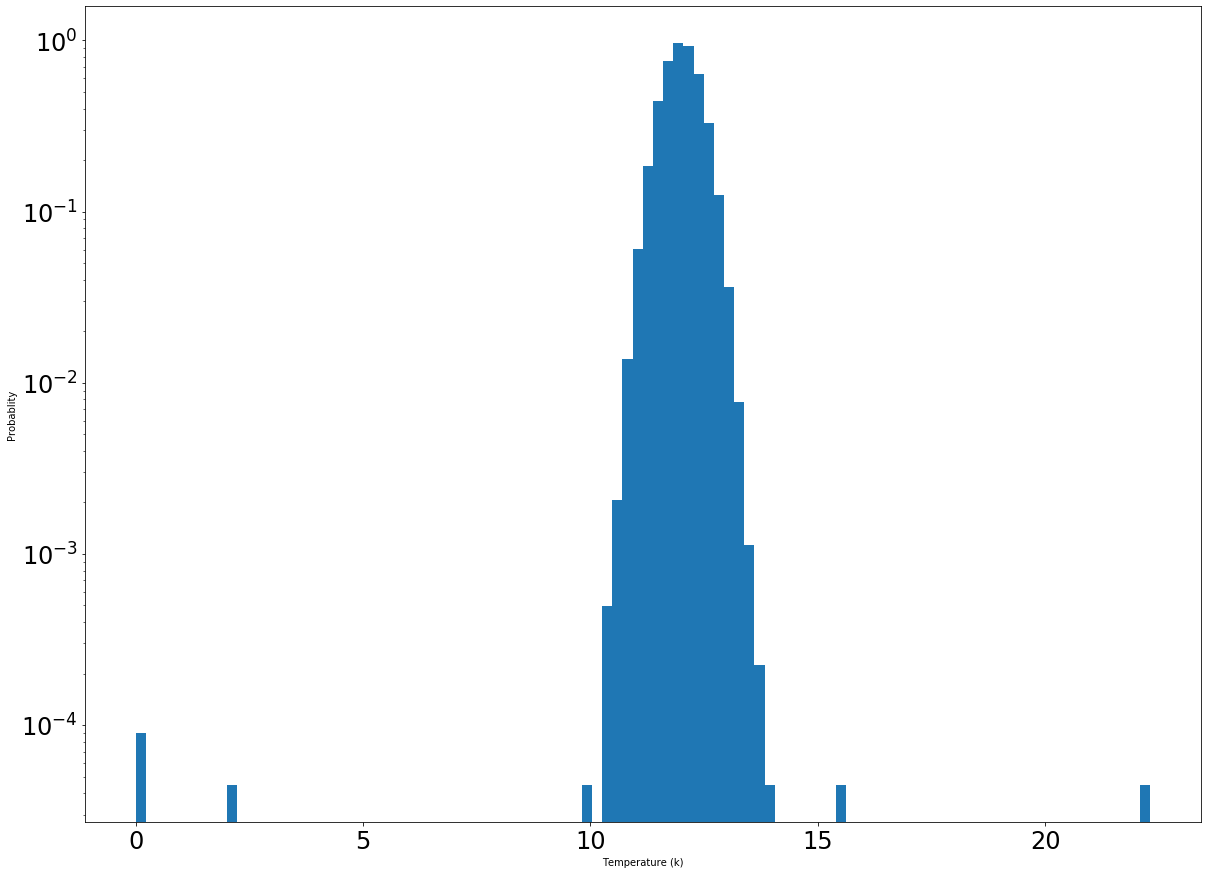

In [8]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlabel('Temperature (k)')
plt.ylabel('Probablity')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

A) So our goal is to identify bad data and throw it out.
Start by exploring the data you have created with appropriate plots
State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.
Restate your question in math. Be very clear.
Apply your statistical test and construct a truth table.

Explore the data by applying a narrower x limit to the plot


##### The goal is to and throw out all the 'bad' temperature data points, so the the statistical questions to be asked are: what is the sigma value that can eliminate all the 'bad' data points? For that given sigma value, what is th probability of throwing out 'good' temperature data points as 'bad' data points?
##### In math: 
1. Xσ = ppf(cdf(bT)), bT= closest 'bad' data point to mean
2. p=2(1-cdf(x)) 

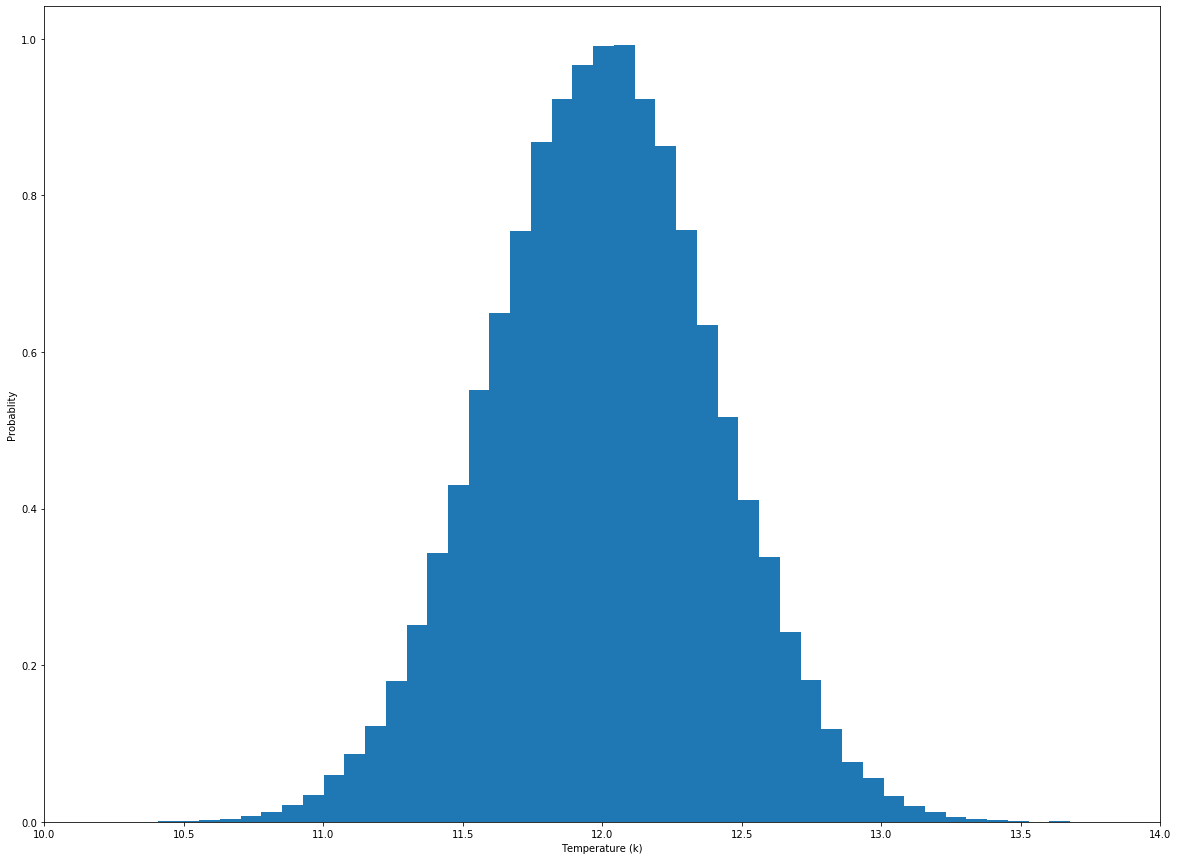

In [9]:
plt.xlim(10,14)
plt.hist(d,300, density=True)
plt.xlabel('Temperature (k)')
plt.ylabel('Probablity')
plt.show()


In [10]:
bT= 12.7
sigma= stats.norm.ppf(stats.norm.cdf(bT-0.00001,loc=12,scale=0.4))
print("Sigma value is", sigma)

Sigma value is 1.7499749999999998


In [11]:
def badlist(sigma):
    bad=[]
    for i in range (len(d)):
        if d[i] >(12+0.4*sigma):
            bad.append(d[i])
        elif d[i] <(12-0.4*sigma):
            bad.append(d[i])
    return bad

truebad=[10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]

def badlistT(sigma):
    badT=[]
    for i in range (len(truebad)):
        if truebad[i] >(12+0.4*sigma):
            badT.append(truebad[i])
        elif truebad[i] <(12-0.4*sigma):
            badT.append(truebad[i])
    return badT
        


In [12]:
print("Total number of 'good' data points identified as 'bad' is", len(badlist(sigma)))
print("Corrected identified 'bad' data points are", badlistT(sigma),",",len(badlistT(sigma)), "out of 8 are correctly identified." )

Total number of 'good' data points identified as 'bad' is 8048
Corrected identified 'bad' data points are [10.0, 10.3, 2.1, 0.0, 0.0, 15.6, 22.3, 12.7] , 8 out of 8 are correctly identified.


In [30]:
p=2*(1-stats.norm.cdf(bT,loc=12,scale=0.4))
print(f'probability of miscategorizing "good" data points is {p:.2f}.') 
print(2*(1-stats.norm.cdf(14,loc=12,scale=0.4)))

probability of miscategorizing "good" data points is 0.08.
5.733031438470704e-07


Threshold of 1.75 σ 

|     | True T | Bad T|
|------|------|------|
|  Your Test Good  |91927 | 0|
|   Your Test Bad |8073 |8|

B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

Threshold of 5σ

|     | True T | Bad T|
|------|------|------|
|  Your Test Good  |100000 | 3|
|   Your Test Bad |0 |5|

Threshold of 4σ

|     | True T | Bad T|
|------|------|------|
|  Your Test Good  |99993|1|
|   Your Test Bad | 7|7|

Threshold of 3σ

|     | True T | Bad T|
|------|------|------|
|  Your Test Good  |99752| 1|
|   Your Test Bad |248 |7|

Threshold of 2σ

|     | True T | Bad T|
|------|------|------|
|  Your Test Good  |95396| 1|
|   Your Test Bad |4604 |7|

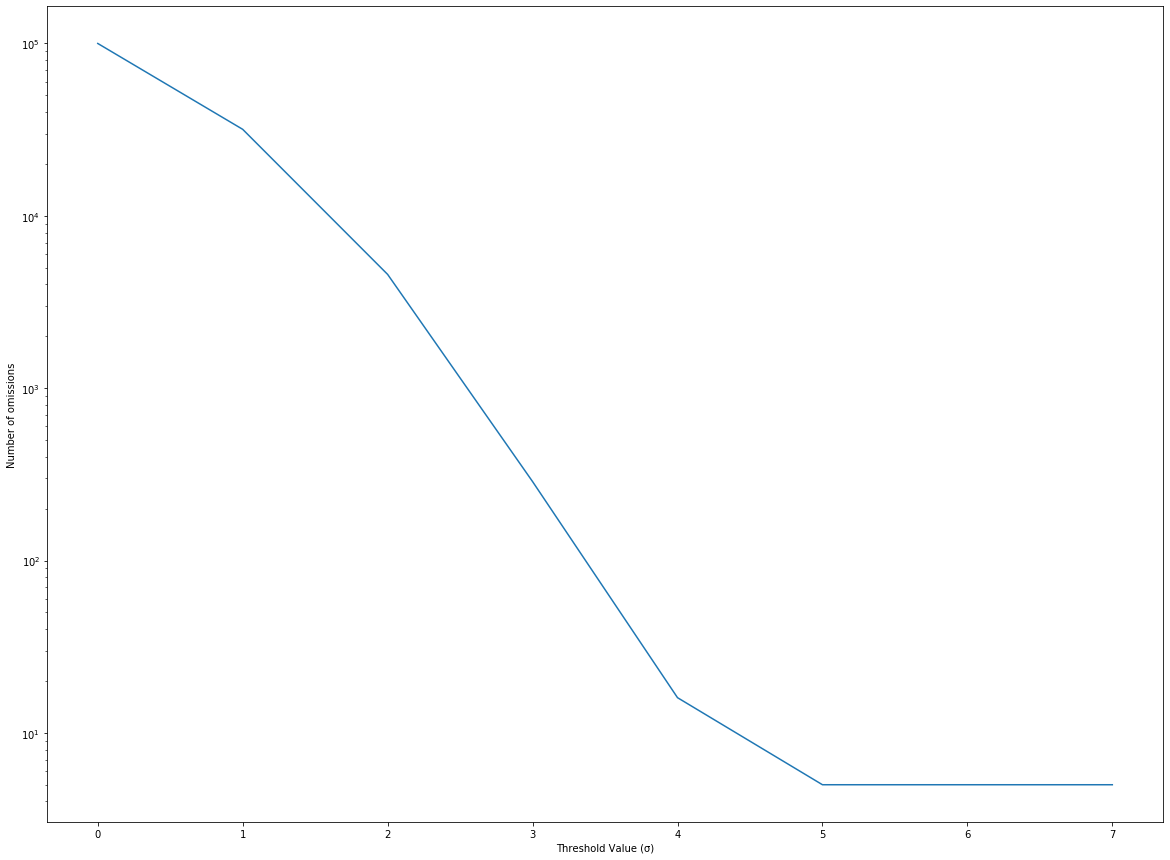

In [41]:
x = np.linspace(0,7,8)
omi=np.zeros(8)
for i in range(len(x)):
    omi[i]=len(badlist(x[i]))
plt.yscale('log')
plt.xlabel('Threshold Value (σ)')
plt.ylabel('Number of omissions')
plt.plot(x,omi)


##### As we can observe from the logscale plot above, the number of omissions decreases as threshold value gets bigger, and it drops dramatically at 5σ. In fact, at 5σ the probablity of omitting 'good' data points is 5.7e-07, and the number of omissions becomes zero.

C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

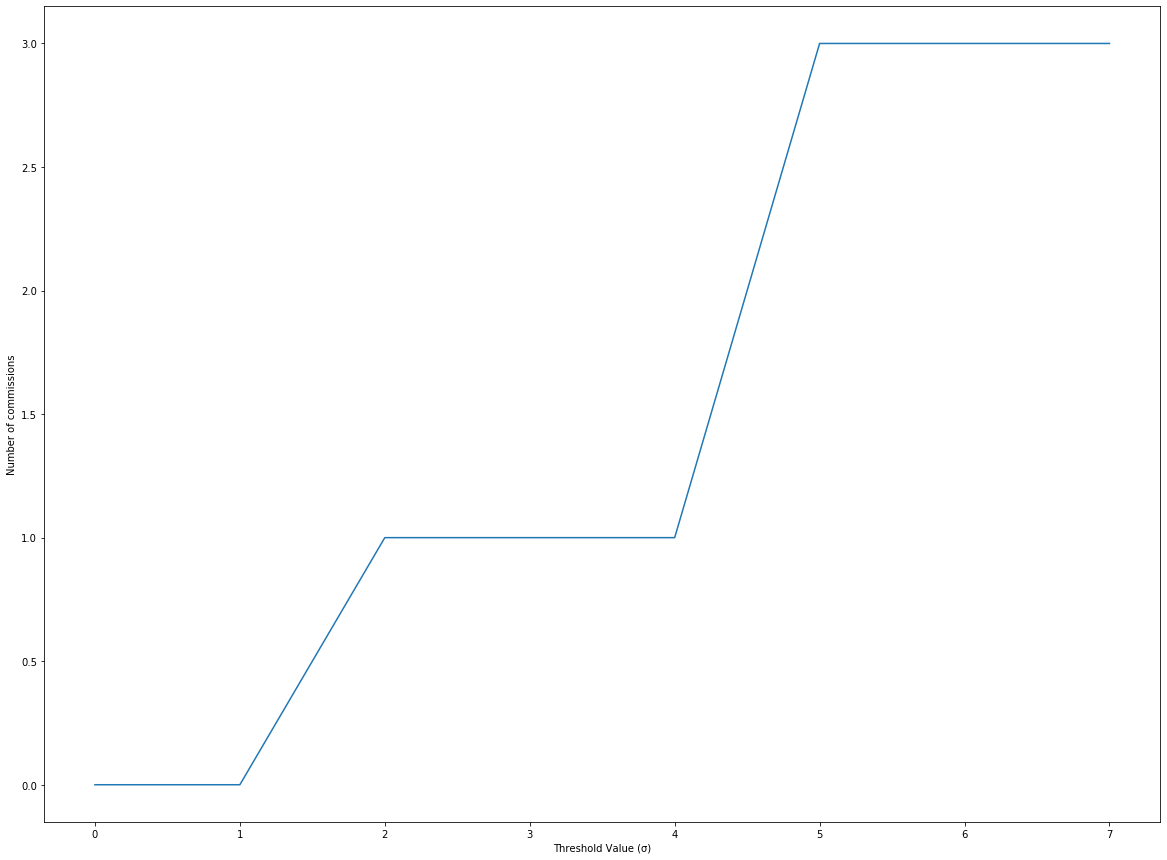

In [43]:
com=np.zeros(8)
for i in range(len(x)):
    com[i]=8-len(badlistT(x[i]))
plt.xlabel('Threshold Value (σ)')
plt.ylabel('Number of commissions')
plt.plot(x,com)

##### In 1a, it was observed that the greatest threshold value with no mistakes of commission is 1.75σ. When the threshold value is greater than 1.75σ, the number of commissions increases discretely as threshold value increases.

### Problem 2

In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:

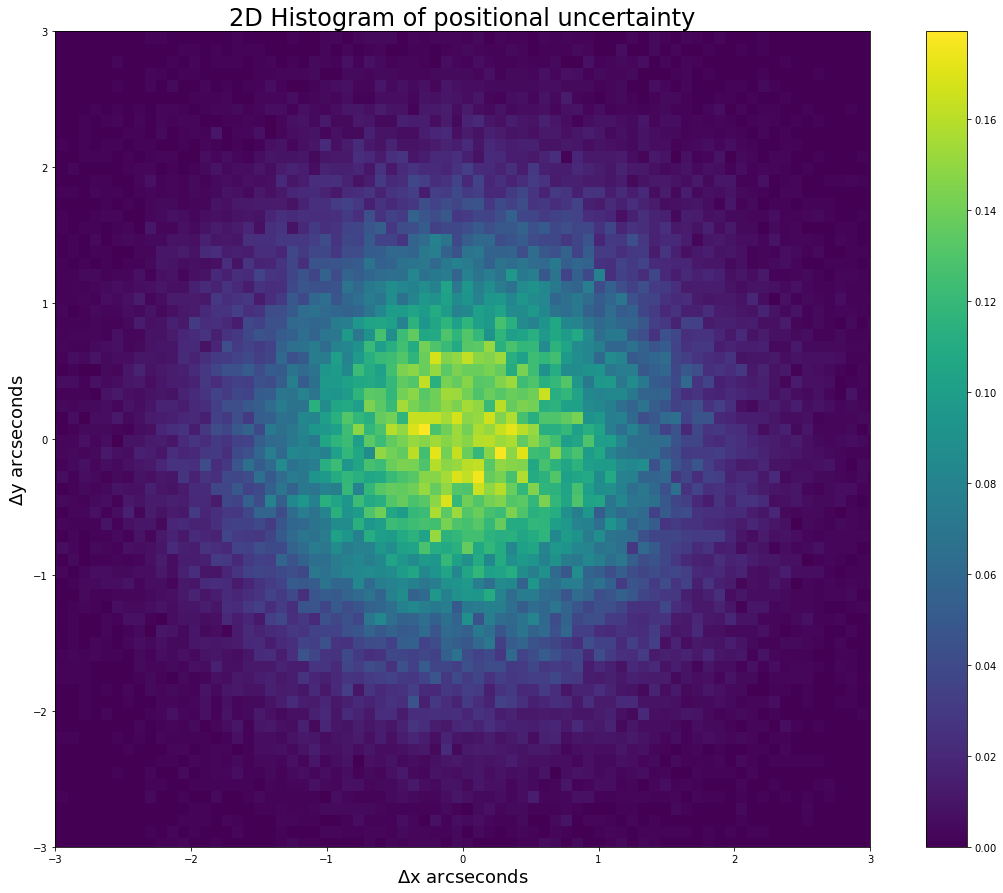

In [2]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?

1.What is the question in words?

##### Question: What is the distance the asteroid would have to move to produce a '5 sigma' detection?

2.What is the question in math? [Hint: Come up with an analytic description of your pdf(). The Blue Book may be helpful here.]

##### Different from previous distributions that were discussed, the random variable here is the distance $\sqrt[2]{X+Y}$. From HW3, problem 2c we know that the pdf of a 2D Gaussian is a Rayleigh distribution:

$ P_{X}(k;\sigma )=P_{Y}(k;\sigma )={\frac {e^{-k^{2}/(2\sigma ^{2})}}{\sqrt {2\pi \sigma ^{2}}}}$ and let Z=$\sqrt[2]{X+Y}$

##### Then the probability density function for Z is the derivative of its cumulative distribution function
$ P_{Z}(k;\sigma )={\frac {x}{\sigma ^{2}}}e^{-k^{2}/(2\sigma ^{2})}$

##### Therefore, to find the distance of '5 sigma'movement, we can use the corresponding 5 sigma value in Rayleigh distribution.

3.What distance in arcseconds represents a 5 sigma detection of motion?

In [11]:
d = stats.rayleigh.ppf(stats.norm.cdf(5))
print(f'The distance represents a 5 simga detection is {d:.2f} arcsecond')

The distance represents a 5 simga detection is 5.49 arcsecond


### Problem 3

As we discussed in class, one of the key backgrounds for gamma-ray telescopes are cosmic rays. Cosmic rays are charged particles—usually protons or electrons but can include atomic nuclei such a alpha particles (helium) or iron. Because of their charge cosmic rays spiral in the magnetic field of the galaxy. From the perspective of the Earth they appear to be coming uniformly from all directions like a high energy gas, and the direction the cosmic ray is travelling when it reaches the Earth tells us nothing about where it came from because we don't know what tortured path it has taken through the galaxy to reach us. However, at trillion electron volt energies and above, the spiral loops are fairly big and the sun and the moon will block cosmic rays. This means the sun and the moon appear as holes in the cosmic ray sky (cosmic rays from that direction are absorbed).
Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?

1. What is the question in words?

##### Question: What is the probability that 6800 cosmic rays or less are obeserved in 7200 minutes?

2. Translate the question to math, describing both the expected background pdf() and the integral you need to do.


##### The expected background pdf will be a poisson distribution with λ= 1, convoluted over 15 days. 

$ probablity=\int _{0}^{6800}pdf(x)dx = cdf(6800)$,


3. Convert to sigma.

In [26]:
sigma= stats.norm.ppf(stats.poisson.cdf(6800,7200))
print(sigma)

-4.750747965777188


In [29]:
print(f'The signficance of the moon shadow detection is 4.7 sigma, which is below the threshold of 5 sigma detection')

The signficance of the moon shadow detection is 4.7 "\sigma"
